In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('dataframe.csv', sep = ',')

# Data included 

The data was originally in the SQLite format downloaded from https://www.kaggle.com/hugomathien/soccer (European Soccer Database). <br>
Additional data was gathered from https://www.kaggle.com/jiezi2004/soccer (European Soccer Database Supplementary. <br>
We have chosen to look at only the Premier League (England) for this project. <br>
Data included for the project is:

In [4]:
df.columns.values

array(['Unnamed: 0', 'id', 'country_id', 'league_id', 'season', 'stage',
       'date', 'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'home_y1', 'home_y2', 'home_r',
       'away_y1', 'away_y2', 'away_r', 'home_fouls', 'away_fouls',
       'home_poss', 'away_poss'], dtype=object)

id: Unique ID for match <br>
country_id: Denotes country (can be omitted after filtering for England) <br>
league_id: Which division the game is taking place in <br>
season: season, e.g. 2012/2013 <br>
stage: where the game is played <br>
date: date <br>
match_api_id: identifier related to the original data source <br>
home_team_api_id: unique indentifier for the home team <br>
away_team_api_id: unique identifier for the away team <br>
home_team_goal: number of goals scored by the home team <br>
away_team_goal: number of goals scored by the away team <br>
home_y1: number of first time offence yellow cards for the home team in a match <br>
home_y2: number of second time offence yellow cards for the home team in a match <br>
home_r: number of red cards for the home team in a match <br>
away_y1: number of first time offence yellow cards for the away team in a match <br>
away_y2: number of second time offence yellow cards for the away team in a match <br>
away_r: number of red cards for the away team in a match <br>
home_fouls: number of fouls committed by the home team in a match <br>
away_fouls: number of fouls committed by the away team in a match <br>
home_poss: average possession for the home team in a match <br>
away_poss: average possession for the away team in a match 

# Descriptive Statistics 

Looking at ordinal and ratio variables we can describe their statistics.

In [7]:
#Subset non-categorical variables
df_noncategorical = df.loc[:, ['home_team_goal', 'away_team_goal',
                           'home_y1', 'home_y2', 'home_r', 
                           'away_y1', 'away_y2', 'away_r',
                           'home_fouls', 'away_fouls',
                           'home_poss', 'away_poss']]

df_noncategorical.describe()

,home_team_goal,away_team_goal,home_y1,home_y2,home_r,away_y1,away_y2,away_r,home_fouls,away_fouls,home_poss,away_poss
count,3040.000000,3040.000000,3040.000000,3040.000000,3040.000000,3040.000000,3040.000000,3040.000000,3040.000000,3040.000000,3040.000000,3040.000000
mean,1.550987,1.159539,1.417105,0.023026,0.041776,1.802303,0.045066,0.051645,10.691118,11.397697,51.798191,48.037335
std,1.311615,1.144629,1.167892,0.150012,0.204984,1.285526,0.212187,0.230092,3.545546,3.687183,8.866714,8.831752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,8.000000,9.000000,46.500000,42.500000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,11.000000,11.000000,51.750000,48.155556
75%,2.000000,2.000000,2.000000,0.000000,0.000000,3.000000,0.000000,0.000000,13.000000,14.000000,57.500000,53.500000
max,9.000000,6.000000,7.000000,1.000000,2.000000,9.000000,2.000000,2.000000,26.000000,25.000000,79.750000,78.750000


We can also look at the correlation between variables

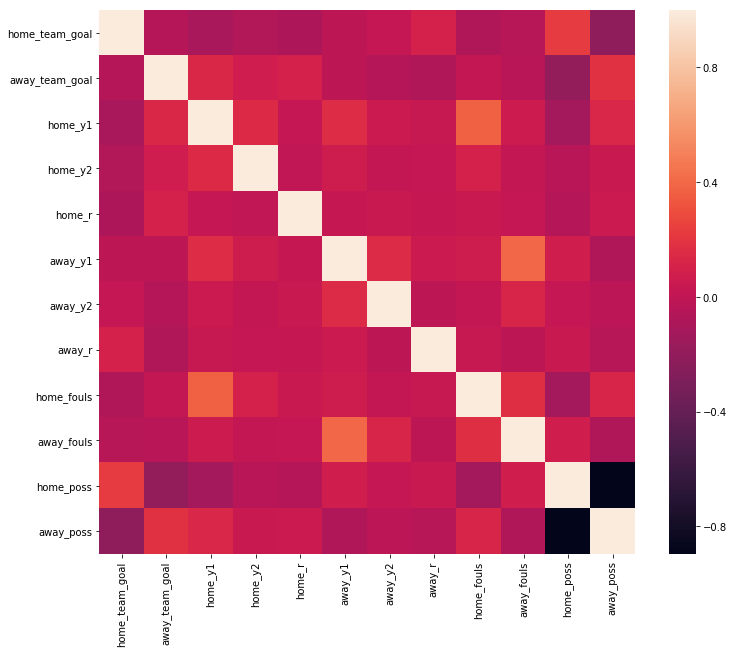

In [12]:
plt.figure(figsize = (12,10))
corr = df_noncategorical.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

We see (which may not be super surprising) that correlation generally exists between possession and goals as well as fouls and cards.